In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

bornoDict =	{
  'অ': 1,
  'আ': 2,
  'ই': 3,
  'ঈ': 4,
  'উ': 5,
  'ঊ': 6,
  'ঋ': 7,
  'এ': 8,
  'ঐ': 9,
  'ও': 10,
  'ঔ': 11,
  'ক': 12,
  'খ': 13,
  'গ': 14,
  'ঘ': 15,
  'ঙ': 16,
  'চ': 17,
  'ছ': 18,
  'জ': 19,
  'ঝ': 20,
  'ঞ': 21,
  'ট': 22,
  'ঠ': 23,
  'ড': 24,
  'ঢ': 25,
  'ণ': 26,
  'ত': 27,
  'থ': 28,
  'দ': 29,
  'ধ': 30,
  'ন': 31,
  'প': 32,
  'ফ': 33,
  'ব': 34,
  'ভ': 35,
  'ম': 36,
  'য': 37,
  'র': 38,
  'ল': 39,
  'শ': 40,
  'ষ': 41,
  'স': 42,
  'হ': 43,
  'ড়': 44,
  'ঢ়': 45,
  'য়': 46
}

def wordCharacterToUnicode(arr, arrOutput):
  for i in range(0, len(arr)):
    temp = arr[i];
    count = 0
    for j in temp:
      arrOutput[i][count]= ord(j) - 2400
      count = count + 1

def labelCharacterToInteger(arry, arryoutput):
  for i in range (0, len(arry)):
        arryoutput[i]= bornoDict[arry[i]]


data = pd.read_csv('inputbn.csv', sep=',', engine='python', header=0)
data = data.to_numpy()

x_sample = data[:,0]
y_sample = data[:,1]

X = np.zeros(shape = (100, 10))
wordCharacterToUnicode(x_sample, X)
Y = np.zeros(shape = (100, 1))
labelCharacterToInteger(y_sample, Y)
print(X[0:5])
print(Y[0:5])

trainX, testX, trainy, testy = train_test_split(X, Y, test_size=0.2)

[[ 76.  82.  94.   0.   0.   0.   0.   0.   0.   0.]
 [ 53.  69.  94.   0.   0.   0.   0.   0.   0.   0.]
 [ 39.  82.  95.  86.   0.   0.   0.   0.   0.   0.]
 [ 76.  94.  82.  95.  53.  94.   0.   0.   0.   0.]
 [ 78.  72. 103.   0.   0.   0.   0.   0.   0.   0.]]
[[34.]
 [12.]
 [ 3.]
 [34.]
 [36.]]


In [ ]:
opt = Adam(lr = 0.001)
model = Sequential()
model.add(Dense(output_dim=1, init='uniform', activation='relu', input_dim=10))
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(trainX, trainy, validation_data=(testX, testy), batch_size=2, epochs=1000, verbose=2)
model.summary()








Train on 80 samples, validate on 20 samples
Epoch 1/1000




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=1, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until





 - 9s - loss: 366.8370 - acc: 0.0875 - val_loss: 175.2834 - val_acc: 0.2000
Epoch 2/1000
 - 0s - loss: 158.7220 - acc: 0.1125 - val_loss: 163.7816 - val_acc: 0.1500
Epoch 3/1000
 - 0s - loss: 124.3758 - acc: 0.1000 - val_loss: 164.7019 - val_acc: 0.2500
Epoch 4/1000
 - 0s - loss: 116.4751 - acc: 0.1000 - val_loss: 151.1381 - val_acc: 0.1500
Epoch 5/1000
 - 0s - loss: 109.0578 - acc: 0.1250 - val_loss: 131.9166 - val_acc: 0.2000
Epoch 6/1000
 - 0s - loss: 103.4602 - acc: 0.1250 - val_loss: 128.5111 - val_acc: 0.2000
Epoch 7/1000
 - 0s - loss: 98.8945 - acc: 0.1375 - val_loss: 126.0930 - val_acc: 0.1500
Epoch 8/1000
 - 0s - loss: 94.9510 - acc: 0.1375 - val_loss: 115.2798 - val_acc: 0.1500
Epoch 9/1000
 - 0s - loss: 93.0809 - acc: 0.1250 - val_loss: 115.1352 - val_acc: 0.2000
Epoch 10/1000
 - 0s - loss: 90.2047 - acc: 0.1000 - val_loss: 111.0212 - val_acc: 0.2000
Epoch 11/1000
 - 0s - loss: 87.0901 - acc: 0.1000 - val_loss: 110.7544 - val_acc: 0.2000
Epoch 12/1000
 - 0s - loss: 85.794

In [ ]:
# evaluate the keras model
loss, accuracy = model.evaluate(X, Y)
print("\nLoss: %.3f, Accuracy: %.2f%%" % (loss, accuracy*100))

100/100 [==============================] - 0s 75us/step

Loss: 6.849, Accuracy: 25.00%


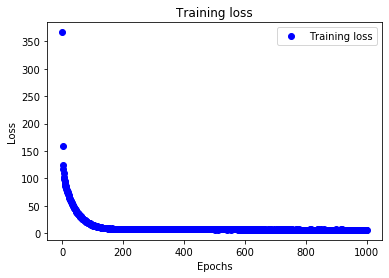

In [ ]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history_dict['acc']
loss = history_dict['loss']
epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

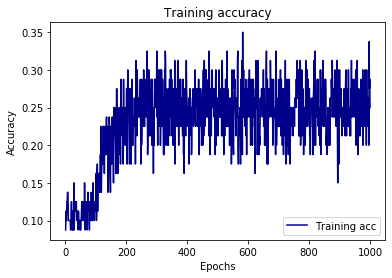

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, color='darkblue', label='Training acc' )
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()


In [ ]:
tempString = 'সরকারি'
Y = bornoDict['স']
tempInput = np.zeros(shape=(1,10))
count = 0
for i in tempString:
  tempInput[0][count]= ord(i) - 2400
  count = count + 1
print(tempInput)
probability = model.predict(tempInput)
print(probability)

key_list = list(bornoDict.keys()) 
val_list = list(bornoDict.values()) 
probability = np.round(probability)
print(probability)  
print(key_list[val_list.index(probability)]) 


[[88. 80. 53. 94. 80. 95.  0.  0.  0.  0.]]
[[48.611443]]
[[49.]]


ValueError: ignored